<a href="https://colab.research.google.com/github/ay314/Calculator-/blob/main/covid19_pridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
#load data
url = "/content/covid_19_clean_complete.csv"
data = pd.read_csv(url)
# Display 1st few rows it can be from start (head) or end (tail)
data.head(50)



,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0.0,0.0,0.0,0.0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0.0,0.0,0.0,0.0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0.0,0.0,0.0,0.0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0.0,0.0,0.0,0.0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0.0,0.0,0.0,0.0,Africa
5,NaN,Antigua and Barbuda,17.060800,-61.796400,2020-01-22,0.0,0.0,0.0,0.0,Americas
6,NaN,Argentina,-38.416100,-63.616700,2020-01-22,0.0,0.0,0.0,0.0,Americas
7,NaN,Armenia,40.069100,45.038200,2020-01-22,0.0,0.0,0.0,0.0,Europe
8,Australian Capital Territory,Australia,-35.473500,149.012400,2020-01-22,0.0,0.0,0.0,0.0,Western Pacific
9,New South Wales,Australia,-33.868800,151.209300,2020-01-22,0.0,0.0,0.0,0.0,Western Pacific


In [ ]:
#INFO FOR DATASET
print("\data.Info:")
print(data.info())


\data.Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46819 entries, 0 to 46818
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14015 non-null  object 
 1   Country/Region  46819 non-null  object 
 2   Lat             46819 non-null  float64
 3   Long            46819 non-null  float64
 4   Date            46818 non-null  object 
 5   Confirmed       46818 non-null  float64
 6   Deaths          46818 non-null  float64
 7   Recovered       46818 non-null  float64
 8   Active          46818 non-null  float64
 9   WHO Region      46818 non-null  object 
dtypes: float64(6), object(4)
memory usage: 3.6+ MB
None


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3505546549.py:2: SyntaxWarning: invalid escape sequence '\d'
  print("\data.Info:")


In [ ]:
#Summary Statistics
print("\nSumary:")
print(data.describe())


Sumary:
                Lat          Long     Confirmed         Deaths     Recovered  \
count  46819.000000  46819.000000  4.681800e+04   46818.000000  4.681800e+04   
mean      21.438024     23.563165  1.480032e+04     808.488466  6.668609e+03   
std       24.951680     70.466856  1.109591e+05    5915.367921  4.549087e+04   
min      -51.796300   -135.000000  0.000000e+00       0.000000  0.000000e+00   
25%        7.873054    -15.310100  3.000000e+00       0.000000  0.000000e+00   
50%       23.634500     21.745300  1.460000e+02       2.000000  2.200000e+01   
75%       41.204380     80.771797  1.319000e+03      25.000000  5.800000e+02   
max       71.706900    178.065000  3.711413e+06  140119.000000  1.459072e+06   

             Active  
count  4.681800e+04  
mean   7.323221e+03  
std    6.793877e+04  
min   -1.400000e+01  
25%    0.000000e+00  
50%    2.300000e+01  
75%    5.330000e+02  
max    2.448574e+06  


In [ ]:
#Missing values check
print("\n Missing values:")
print(data.isnull().sum())


 Missing values:
Province/State    32804
Country/Region        0
Lat                   0
Long                  0
Date                  1
Confirmed             1
Deaths                1
Recovered             1
Active                1
WHO Region            1
dtype: int64


In [ ]:
#DROP DUPLICATE ROWS (IF ANY)
data = data.drop_duplicates()

#HANDLE MISSING VALUES (IF ANY)
data = data.fillna(0)

print("\nAfter Cleaning:")
print(data.info())
print(data.isnull())


After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46819 entries, 0 to 46818
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  46819 non-null  object 
 1   Country/Region  46819 non-null  object 
 2   Lat             46819 non-null  float64
 3   Long            46819 non-null  float64
 4   Date            46819 non-null  object 
 5   Confirmed       46819 non-null  float64
 6   Deaths          46819 non-null  float64
 7   Recovered       46819 non-null  float64
 8   Active          46819 non-null  float64
 9   WHO Region      46819 non-null  object 
dtypes: float64(6), object(4)
memory usage: 3.6+ MB
None
       Province/State  Country/Region    Lat   Long   Date  Confirmed  Deaths  \
0               False           False  False  False  False      False   False   
1               False           False  False  False  False      False   False   
2               False           Fa

In [ ]:
data.to_csv("cleaned_data.csv", index=False)
print(data.head())
print(data.info())
print(data.describe())
print("CLEANED DATA SAVED IN CSV FILE\n")

  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0              0    Afghanistan  33.93911  67.709953  2020-01-22        0.0   
1              0        Albania  41.15330  20.168300  2020-01-22        0.0   
2              0        Algeria  28.03390   1.659600  2020-01-22        0.0   
3              0        Andorra  42.50630   1.521800  2020-01-22        0.0   
4              0         Angola -11.20270  17.873900  2020-01-22        0.0   

   Deaths  Recovered  Active             WHO Region  
0     0.0        0.0     0.0  Eastern Mediterranean  
1     0.0        0.0     0.0                 Europe  
2     0.0        0.0     0.0                 Africa  
3     0.0        0.0     0.0                 Europe  
4     0.0        0.0     0.0                 Africa  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46819 entries, 0 to 46818
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
print(data.columns.tolist())

['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'WHO Region']


In [ ]:
 Afghanistan = data[data['Country/Region'] == 'Afghanistan']

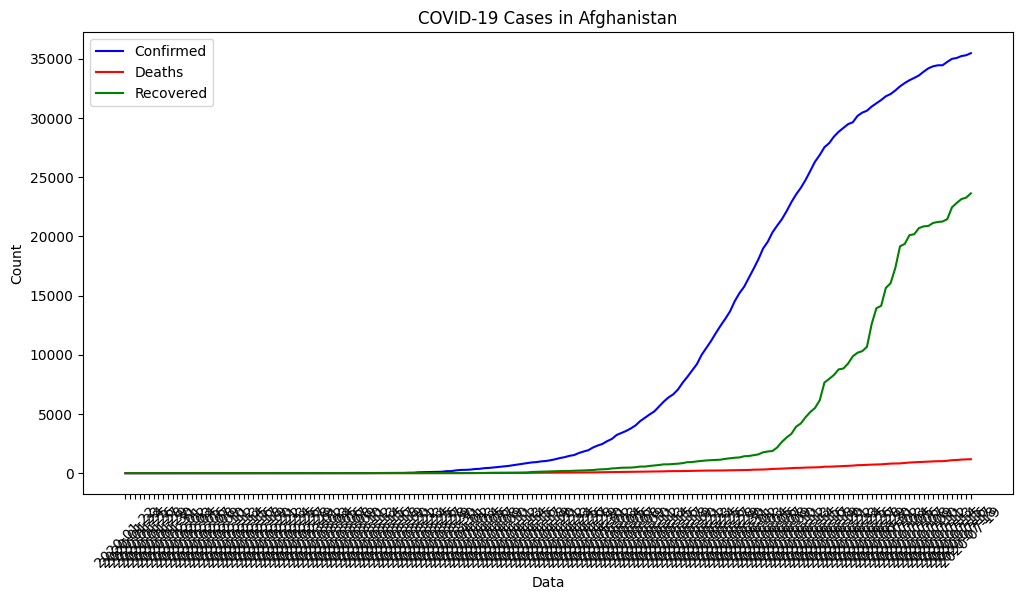

In [ ]:

 plt.figure(figsize=(12, 6))
 plt.plot(Afghanistan['Date'], Afghanistan['Confirmed'], label='Confirmed', color='blue')
 plt.plot(Afghanistan['Date'], Afghanistan['Deaths'], label='Deaths', color='red')
 plt.plot(Afghanistan['Date'], Afghanistan['Recovered'], label='Recovered', color='green')
 plt.xticks(rotation=45) # rotate the data table so they don't overlap
 plt.xlabel('Data')
 plt.ylabel('Count')
 plt.title('COVID-19 Cases in Afghanistan')
 plt.legend() # to add box of which colour indicates what
 plt.show()

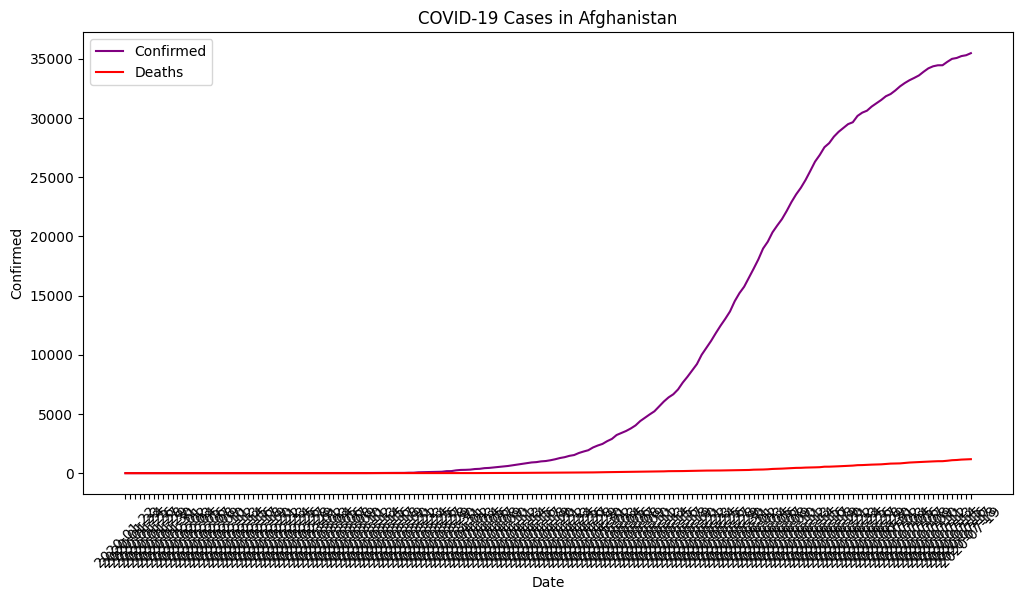

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Confirmed', data=Afghanistan, label='Confirmed', color='purple')
sns.lineplot(x='Date', y='Deaths', data=Afghanistan, label='Deaths', color='red')
plt.title('COVID-19 Cases in Afghanistan')
plt.xticks(rotation=45) # ya rotation 45 kab use hota hia jab bhut sara dates ho to in seris ma tab vo over lap ho sakta hai tab ya use kar na sa  vo overlap nahi hota
plt.show()

*WHY PLOTLY IS USED  ?*
*PLOTLY is mainly use to crearte intercative graph   
 1.you can hover  over pont to see exact values    
2. you can Zoom in and out
3. you can toggle line on/off






In [ ]:
fig = px.line(Afghanistan, x='Date', y=['Confirmed', 'Deaths', 'Recovered'], title='COVID-19 Cases in Afghanistan(Interactive)')
fig.show()